In [1]:
#ouverture et lecture des json
import nltk
import spacy
import json
import tqdm
import spacy
import glob
import re
import os
def ouvrir_json(chemin):
    f = open(chemin, encoding="UTF-8")
    toto = json.load(f)
    f.close()
    return toto
def ecrire_json(chemin, contenu):
    with open(chemin, "w") as f:
        f.write(json.dumps(contenu, indent=2))
        f.close()
def ecrire_fichier(chemin, contenu):
  w = open(chemin, "w", encoding="utf-8")
  w.write(contenu)
  w.close()
def lire_fichier(chemin):
  f = open(chemin, "r", encoding="utf-8")
  chaine = f.read()
  f.close()
  return chaine
def Splittxt(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w+-\w+|\w+\S|(\w\.)*\w.|\w+|\S|\w+\S|\?|\!)")
    txt_split = tokenizer.tokenize(txt)
    return 
def Splittxt4(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w+-\w+|\w+\S|((\w\.)*\w.)|\w+|\S|\w+\S|\?|\!)")
    txt_split = tokenizer.tokenize(txt)
    return 
def Splittxt3(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w[\w\.]{1,}|\w+-\w+|\w+\S|\w+|\S|\w+\S|\?|\!)")
    txt_split = tokenizer.tokenize(txt)
    return txt_split
def Splittxt2(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w+'|\w+-\w+|\w+|\S|\w+\S)")
    txt_split = tokenizer.tokenize(txt)
    return txt_split

chemin = glob.glob('lieux_paris/*/*')
vrai_entite_nomme = []
dic_lieu = {}
for i in chemin:
    lieux_de_paris = ouvrir_json(i)
    for lieu in lieux_de_paris:
        #print(lieu)
        vrai_entite_nomme.append(lieu)

In [2]:
corpus = ouvrir_json("tmp.json")

In [61]:
dictionnaire_ia2 = {}
for nom_artiste ,liste_chansons in tqdm.tqdm(corpus.items()):
    for element in liste_chansons:
        date = element["release_date"]
        if date is None:
            date = "None"
        titre = element["full_title"]
        texte = element["lyrics"]
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            artiste = "pas de nom"
        dictionnaire_ia2.setdefault(date[:4], {"Artiste":artiste, "Titre":titre, "Lyrics":texte})
        dictionnaire_ia2[date[:4]]["Artiste"] = artiste
        dictionnaire_ia2[date[:4]]["Titre"] = titre
        dictionnaire_ia2[date[:4]]["Lyrics"] = texte
#print(dictionnaire_ia)
ecrire_json("dictionnaire_ia2.json", dictionnaire_ia2)

100%|████████████████████████████████████████████████████████████████████████████| 1251/1251 [00:00<00:00, 8884.76it/s]


In [44]:
dictionnaire_ia = {}
for nom_artiste ,liste_chansons in tqdm.tqdm(corpus.items()):
    for element in liste_chansons:
        titre = element["full_title"]
        texte = element["lyrics"]
        date = element["release_date"]
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            artiste = "pas de nom"
        dictionnaire_ia.setdefault(date, {"Artiste":"", "Titre":"", "Lyrics":""})
        dictionnaire_ia[date]["Artiste"] = artiste
        dictionnaire_ia[date]["Titre"] = titre
        dictionnaire_ia[date]["Lyrics"] = texte
#print(dictionnaire_ia)
ecrire_json("dictionnaire_ia.json", dictionnaire_ia)

100%|███████████████████████████████████████████████████████████████████████████| 1251/1251 [00:00<00:00, 11270.14it/s]


In [62]:
dictionnaire_ia3 = {}
for nom_artiste ,liste_chansons in tqdm.tqdm(corpus.items()):
    for element in liste_chansons:
        titre = element["full_title"]
        texte = element["lyrics"]
        date = element["release_date"]
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            artiste = "pas de nom"
        dictionnaire_ia3.setdefault(date, [])
        if texte not in dictionnaire_ia3:
            dictionnaire_ia3[date].append([artiste, titre, texte])
ecrire_json("dictionnaire_ia3.json", dictionnaire_ia3)

100%|███████████████████████████████████████████████████████████████████████████| 1251/1251 [00:00<00:00, 10601.67it/s]


In [ ]:
dictionnaire_ia4 = {}
for nom_artiste ,liste_chansons in tqdm.tqdm(corpus.items()):
    for element in liste_chansons:
        date = element["release_date"]
        if date is None:
            date = "None"
        titre = element["full_title"]
        texte = element["lyrics"]
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            artiste = "pas de nom"
        dictionnaire_ia4.setdefault(date[:4], [])
        if texte not in dictionnaire_ia3:
            dictionnaire_ia4[date[:4]].append([artiste, titre, texte])
ecrire_json("dictionnaire_ia4.json", dictionnaire_ia4)

In [ ]:
frequence_texte = {}
for date, valeur in sorted(dictionnaire_ia4.items(), key=lambda x: x[0], reverse=False):
    for i in valeur:
        artiste = i[0]
        titre = i[1]
        texte = i[2]
        

# Creation du corpus avant de mettre vecteur.

In [186]:
dictionnaire_ia5 = {}
for nom_artiste ,liste_chansons in tqdm.tqdm(corpus.items()):
    for element in liste_chansons:
        date = element["release_date"]
        if date is None:
            date = "None"
        titre = element["full_title"]
        texte = element["lyrics"]
        
        if len(str(texte))> 200:
            texte = element["lyrics"]
        else:
            continue
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            artiste = "pas de nom"
        #if isinstance(date, int) == True:
            #if date[:3] >= 194:
        
        if date !="None" and int(date[:4]) >= 1940:
                dictionnaire_ia5.setdefault(date[:3], {"nbre_de_texte" : 0, "nbre_de_mot" : 0, "nbre_de_caractere" : 0})
                dictionnaire_ia5[date[:3]].setdefault("info_titre", [])
                dic_tempo = {"Titre": titre, "Auteur":artiste}
                dictionnaire_ia5[date[:3]]["info_titre"].append(dic_tempo)
                dictionnaire_ia5[date[:3]].setdefault("chanson", [])
                dictionnaire_ia5[date[:3]]["chanson"].append(texte)
                if texte != None:
                    dictionnaire_ia5[date[:3]]["nbre_de_texte"] += 1
                    mot_split = Splittxt3(texte)
                    nbre_carac = 0
                    for mot in mot_split:
                        for caractere in mot:
                            nbre_carac += 1
                    dictionnaire_ia5[date[:3]]["nbre_de_mot"] += len(mot_split)
                    dictionnaire_ia5[date[:3]]["nbre_de_caractere"] += nbre_carac

                #print(len(mot_split))
                #break
            #break

            #dictionnaire_ia5[date] = { titre : {}}
    #print(dictionnaire_ia5)
ecrire_json("dictionnaire_ia5.json", dictionnaire_ia5)

100%|█████████████████████████████████████████████████████████████████████████████| 1251/1251 [00:09<00:00, 138.36it/s]


In [188]:
dictionnaire_ia6 = {}
for date, valeur in tqdm.tqdm(sorted(dictionnaire_ia5.items(), key=lambda x: x[0], reverse=False)):
    dictionnaire_ia6[date] = valeur
#print(dictionnaire_ia6)
ecrire_json("dictionnaire_ia6.json", dictionnaire_ia6)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


# Initialisation des dates et des textes sur le vectoriseur.

In [79]:
"nbre_de_texte": 126,
    "nbre_de_mot": 32303,
    "nbre_de_caractere": 119054,
"nbre_de_texte": 177,
    "nbre_de_mot": 44939,
    "nbre_de_caractere": 169501,


In [189]:
to_vecteur = ouvrir_json("dictionnaire_ia6.json")
liste_paroles = []
liste_date = []
for date_decennie, dic in tqdm.tqdm(to_vecteur.items()):
    chanson = dic.get("chanson")
    for paroles in chanson:
        liste_date.append(date_decennie)
        liste_paroles.append(paroles)
        
       

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 106.28it/s]


In [190]:
#from sklearn.feature_extraction.text import CountVectorizer
#V = CountVectorizer() 

In [204]:
X = V.fit_transform(liste_paroles)
y = liste_date

from sklearn.feature_extraction.text import CountVectorizer
V = CountVectorizer(ngram_range=(1,1))
X = V.fit_transform(liste_paroles)

## séparer train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

---------------------------------------------------------------- 
 Perceptron et  vectoriseur simple  

Bons résultats 1107
Erreurs: 878
0.5576826196473552
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.5000    0.0625    0.1111        16
        1960     0.3333    0.2632    0.2941        38
        1970     0.1250    0.0600    0.0811        50
        1980     0.0625    0.0469    0.0536        64
        1990     0.2381    0.1364    0.1734       110
        2000     0.3494    0.4086    0.3767       372
        2010     0.7159    0.7475    0.7313      1180
        2020     0.3445    0.2680    0.3015       153

    accuracy                         0.5577      1985
   macro avg     0.2965    0.2214    0.2359      1985
weighted avg     0.5464    0.5577    0.5485      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.5, 'recall': 0.0625, 'f1-score': 0.11111

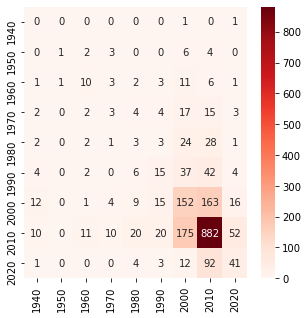


 20%|████████████████▊                                                                   | 1/5 [00:06<00:25,  6.42s/it]

---------------------------------------------------------------- 
 Support vecteur machine sans stat et  vectoriseur simple  

Bons résultats 1186
Erreurs: 799
0.5974811083123426
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0091    0.0180       110
        2000     1.0000    0.0108    0.0213       372
        2010     0.5963    1.0000    0.7471      1180
        2020     1.0000    0.0065    0.0130       153

    accuracy                         0.5975      1985
   macro avg     0.3996    0.1140    0.0888      1985
weighted avg     0.6744    0.5975    0.4501      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0,

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

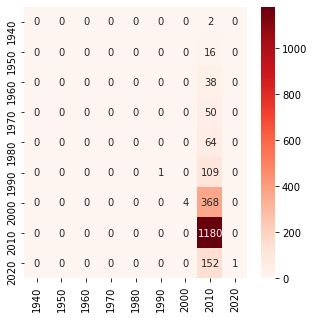


 40%|█████████████████████████████████▌                                                  | 2/5 [02:08<03:43, 74.51s/it]

---------------------------------------------------------------- 
 SVM linéaire et  vectoriseur simple  



C:\Users\andur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Bons résultats 1063
Erreurs: 922
0.5355163727959698
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     1.0000    0.0625    0.1176        16
        1960     0.1724    0.1316    0.1493        38
        1970     0.1304    0.1200    0.1250        50
        1980     0.1250    0.0469    0.0682        64
        1990     0.2083    0.2727    0.2362       110
        2000     0.3412    0.3898    0.3639       372
        2010     0.6899    0.7127    0.7011      1180
        2020     0.3299    0.2092    0.2560       153

    accuracy                         0.5355      1985
   macro avg     0.3330    0.2161    0.2241      1985
weighted avg     0.5297    0.5355    0.5270      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16}, '1960': {'precision': 0.1724137931034483, 'recall': 0.13157894736842105, '

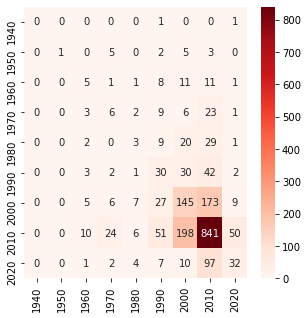


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:29<01:40, 50.24s/it]

---------------------------------------------------------------- 
 Arbre de decision et  vectoriseur simple  

Bons résultats 1186
Erreurs: 799
0.5974811083123426
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.8000    0.0800    0.1455        50
        1980     0.2500    0.0156    0.0294        64
        1990     0.7500    0.0545    0.1017       110
        2000     0.4000    0.0108    0.0209       372
        2010     0.6034    0.9669    0.7431      1180
        2020     0.4478    0.1961    0.2727       153

    accuracy                         0.5975      1985
   macro avg     0.3612    0.1471    0.1459      1985
weighted avg     0.5379    0.5975    0.4769      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

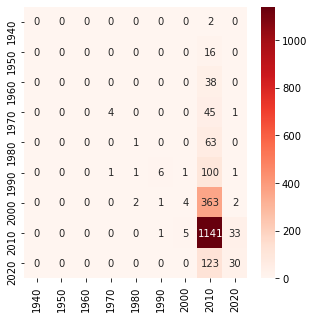


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:40<00:34, 34.40s/it]

---------------------------------------------------------------- 
 Random Forest et  vectoriseur simple  

Bons résultats 1180
Erreurs: 805
0.5944584382871536


C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.0000    0.0000    0.0000       110
        2000     0.0000    0.0000    0.0000       372
        2010     0.5945    1.0000    0.7457      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5945      1985
   macro avg     0.0661    0.1111    0.0829      1985
weighted avg     0.3534    0.5945    0.4433      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, '1960': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 38}, '1970': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 

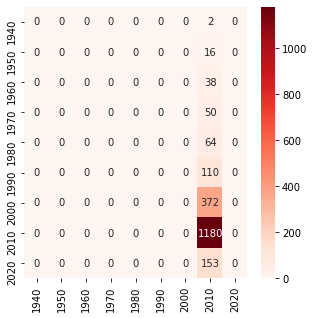


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

---------------------------------------------------------------- 
 Perceptron et  vectoriseur sans maj 

Bons résultats 1107
Erreurs: 878
0.5576826196473552
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.5000    0.0625    0.1111        16
        1960     0.3333    0.2632    0.2941        38
        1970     0.1250    0.0600    0.0811        50
        1980     0.0625    0.0469    0.0536        64
        1990     0.2381    0.1364    0.1734       110
        2000     0.3494    0.4086    0.3767       372
        2010     0.7159    0.7475    0.7313      1180
        2020     0.3445    0.2680    0.3015       153

    accuracy                         0.5577      1985
   macro avg     0.2965    0.2214    0.2359      1985
weighted avg     0.5464    0.5577    0.5485      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.5, 'recall': 0.0625, 'f1-score': 0.1111

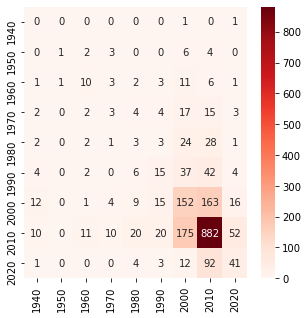


 20%|████████████████▊                                                                   | 1/5 [00:03<00:14,  3.63s/it]

---------------------------------------------------------------- 
 Support vecteur machine sans stat et  vectoriseur sans maj 

Bons résultats 1186
Erreurs: 799
0.5974811083123426
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0091    0.0180       110
        2000     1.0000    0.0108    0.0213       372
        2010     0.5963    1.0000    0.7471      1180
        2020     1.0000    0.0065    0.0130       153

    accuracy                         0.5975      1985
   macro avg     0.3996    0.1140    0.0888      1985
weighted avg     0.6744    0.5975    0.4501      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

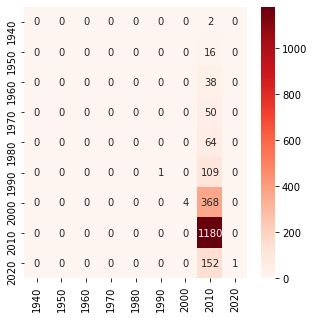


 40%|█████████████████████████████████▌                                                  | 2/5 [02:10<03:48, 76.09s/it]

---------------------------------------------------------------- 
 SVM linéaire et  vectoriseur sans maj 



C:\Users\andur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Bons résultats 1060
Erreurs: 925
0.5340050377833753
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     1.0000    0.0625    0.1176        16
        1960     0.1667    0.1316    0.1471        38
        1970     0.1304    0.1200    0.1250        50
        1980     0.1250    0.0469    0.0682        64
        1990     0.2028    0.2636    0.2292       110
        2000     0.3405    0.3844    0.3611       372
        2010     0.6879    0.7136    0.7005      1180
        2020     0.3196    0.2026    0.2480       153

    accuracy                         0.5340      1985
   macro avg     0.3303    0.2139    0.2219      1985
weighted avg     0.5272    0.5340    0.5250      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16}, '1960': {'precision': 0.16666666666666666, 'recall': 0.13157894736842105, 

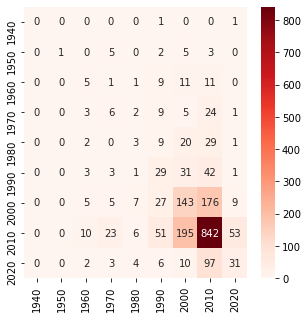


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:30<01:40, 50.31s/it]

---------------------------------------------------------------- 
 Arbre de decision et  vectoriseur sans maj 

Bons résultats 1183
Erreurs: 802
0.5959697732997481
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.6667    0.0800    0.1429        50
        1980     0.2500    0.0156    0.0294        64
        1990     0.6364    0.0636    0.1157       110
        2000     0.3750    0.0081    0.0158       372
        2010     0.6024    0.9644    0.7416      1180
        2020     0.4478    0.1961    0.2727       153

    accuracy                         0.5960      1985
   macro avg     0.3309    0.1475    0.1465      1985
weighted avg     0.5230    0.5960    0.4758      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

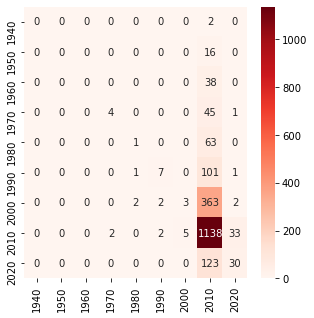


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:33<00:31, 31.91s/it]

---------------------------------------------------------------- 
 Random Forest et  vectoriseur sans maj 

Bons résultats 1180
Erreurs: 805
0.5944584382871536


C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.0000    0.0000    0.0000       110
        2000     0.0000    0.0000    0.0000       372
        2010     0.5945    1.0000    0.7457      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5945      1985
   macro avg     0.0661    0.1111    0.0829      1985
weighted avg     0.3534    0.5945    0.4433      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, '1960': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 38}, '1970': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 

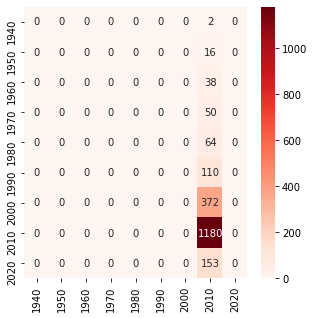


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

---------------------------------------------------------------- 
 Perceptron et  vectoriseur ngramme 

Bons résultats 1140
Erreurs: 845
0.5743073047858942
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.3333    0.0625    0.1053        16
        1960     0.2308    0.0789    0.1176        38
        1970     0.0909    0.0400    0.0556        50
        1980     0.1905    0.0625    0.0941        64
        1990     0.2519    0.3000    0.2739       110
        2000     0.3926    0.3441    0.3668       372
        2010     0.6840    0.8034    0.7389      1180
        2020     0.3500    0.1373    0.1972       153

    accuracy                         0.5743      1985
   macro avg     0.2804    0.2032    0.2166      1985
weighted avg     0.5367    0.5743    0.5459      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.3333333333333333, 'recall': 0.0625, 'f1-

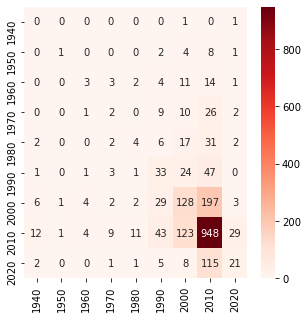


 20%|████████████████▊                                                                   | 1/5 [00:09<00:39,  9.95s/it]

---------------------------------------------------------------- 
 Support vecteur machine sans stat et  vectoriseur ngramme 

Bons résultats 1183
Erreurs: 802
0.5959697732997481
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0091    0.0180       110
        2000     1.0000    0.0027    0.0054       372
        2010     0.5954    1.0000    0.7464      1180
        2020     1.0000    0.0065    0.0130       153

    accuracy                         0.5960      1985
   macro avg     0.3995    0.1131    0.0870      1985
weighted avg     0.6738    0.5960    0.4467      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0,

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

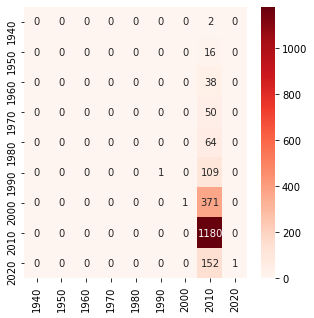


 40%|█████████████████████████████████▏                                                 | 2/5 [05:25<09:29, 189.77s/it]

---------------------------------------------------------------- 
 SVM linéaire et  vectoriseur ngramme 



C:\Users\andur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Bons résultats 1146
Erreurs: 839
0.5773299748110832
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     1.0000    0.0625    0.1176        16
        1960     0.2500    0.1053    0.1481        38
        1970     0.3125    0.1000    0.1515        50
        1980     0.1765    0.0469    0.0741        64
        1990     0.3010    0.2818    0.2911       110
        2000     0.3551    0.3656    0.3603       372
        2010     0.6796    0.8034    0.7363      1180
        2020     0.3333    0.1176    0.1739       153

    accuracy                         0.5773      1985
   macro avg     0.3787    0.2092    0.2281      1985
weighted avg     0.5393    0.5773    0.5447      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16}, '1960': {'precision': 0.25, 'recall': 0.10526315789473684, 'f1-score': 0.1

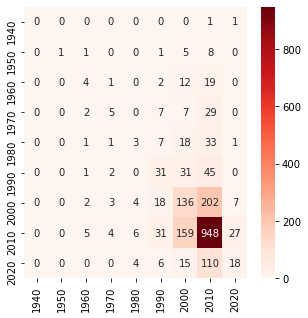


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [07:31<05:20, 160.50s/it]

---------------------------------------------------------------- 
 Arbre de decision et  vectoriseur ngramme 

Bons résultats 1181
Erreurs: 804
0.5949622166246852
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.5000    0.0800    0.1379        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.8750    0.0636    0.1186       110
        2000     0.4483    0.0349    0.0648       372
        2010     0.6021    0.9568    0.7391      1180
        2020     0.4308    0.1830    0.2569       153

    accuracy                         0.5950      1985
   macro avg     0.3174    0.1465    0.1464      1985
weighted avg     0.5362    0.5950    0.4814      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

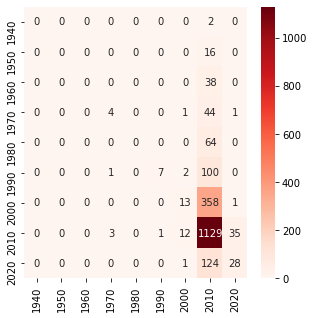


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [07:49<01:44, 104.43s/it]

---------------------------------------------------------------- 
 Random Forest et  vectoriseur ngramme 

Bons résultats 1180
Erreurs: 805
0.5944584382871536
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.0000    0.0000    0.0000       110
        2000     0.0000    0.0000    0.0000       372
        2010     0.5945    1.0000    0.7457      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5945      1985
   macro avg     0.0661    0.1111    0.0829      1985
weighted avg     0.3534    0.5945    0.4433      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 's

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

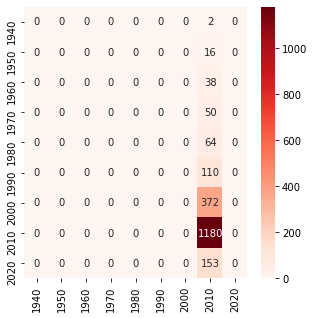


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

---------------------------------------------------------------- 
 Perceptron et  vectoriseur ngramme2 

Bons résultats 1027
Erreurs: 958
0.5173803526448363
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.1667    0.1250    0.1429        16
        1960     0.1429    0.0526    0.0769        38
        1970     0.1875    0.0600    0.0909        50
        1980     0.1111    0.0312    0.0488        64
        1990     0.2597    0.1818    0.2139       110
        2000     0.3198    0.2124    0.2553       372
        2010     0.6565    0.7644    0.7063      1180
        2020     0.2833    0.1111    0.1596       153

    accuracy                         0.5174      1985
   macro avg     0.2364    0.1710    0.1883      1985
weighted avg     0.4988    0.5174    0.4984      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.16666666666666666, 'recall': 0.125, 'f1

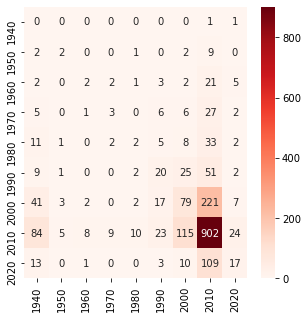


 20%|████████████████▊                                                                   | 1/5 [00:06<00:24,  6.17s/it]

---------------------------------------------------------------- 
 Support vecteur machine sans stat et  vectoriseur ngramme2 

Bons résultats 1183
Erreurs: 802
0.5959697732997481
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0091    0.0180       110
        2000     1.0000    0.0054    0.0107       372
        2010     0.5954    1.0000    0.7464      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5960      1985
   macro avg     0.2884    0.1127    0.0861      1985
weighted avg     0.5967    0.5960    0.4467      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

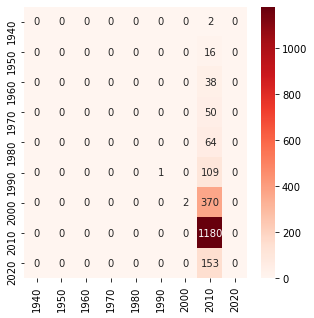


 40%|█████████████████████████████████▏                                                 | 2/5 [04:24<07:43, 154.60s/it]

---------------------------------------------------------------- 
 SVM linéaire et  vectoriseur ngramme2 



C:\Users\andur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Bons résultats 1113
Erreurs: 872
0.5607052896725441
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     1.0000    0.0625    0.1176        16
        1960     0.2000    0.0263    0.0465        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.4000    0.1818    0.2500       110
        2000     0.3146    0.2554    0.2819       372
        2010     0.6298    0.8347    0.7179      1180
        2020     0.2821    0.0719    0.1146       153

    accuracy                         0.5607      1985
   macro avg     0.3140    0.1592    0.1698      1985
weighted avg     0.4891    0.5607    0.5041      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16}, '1960': {'precision': 0.2, 'recall': 0.02631578947368421, 'f1-score': 0.04

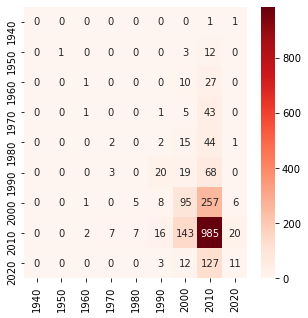


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [06:23<04:36, 138.27s/it]

---------------------------------------------------------------- 
 Arbre de decision et  vectoriseur ngramme2 

Bons résultats 1202
Erreurs: 783
0.6055415617128463
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0818    0.1513       110
        2000     0.5714    0.0323    0.0611       372
        2010     0.6044    0.9864    0.7495      1180
        2020     0.5862    0.1111    0.1868       153

    accuracy                         0.6055      1985
   macro avg     0.3069    0.1346    0.1276      1985
weighted avg     0.5670    0.6055    0.4798      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

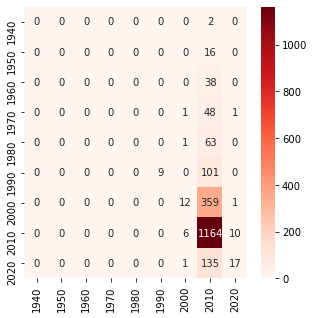


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [06:35<01:28, 88.39s/it]

---------------------------------------------------------------- 
 Random Forest et  vectoriseur ngramme2 

Bons résultats 1180
Erreurs: 805
0.5944584382871536
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.0000    0.0000    0.0000       110
        2000     0.0000    0.0000    0.0000       372
        2010     0.5945    1.0000    0.7457      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5945      1985
   macro avg     0.0661    0.1111    0.0829      1985
weighted avg     0.3534    0.5945    0.4433      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, '

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

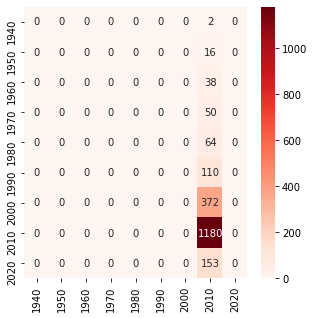


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

---------------------------------------------------------------- 
 Perceptron et  vectoriseur ngramme3 

Bons résultats 1031
Erreurs: 954
0.5193954659949622
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0625    0.0625    0.0625        16
        1960     0.4545    0.1316    0.2041        38
        1970     0.2143    0.0600    0.0938        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.2830    0.1364    0.1840       110
        2000     0.3462    0.1935    0.2483       372
        2010     0.6516    0.7814    0.7106      1180
        2020     0.2321    0.0850    0.1244       153

    accuracy                         0.5194      1985
   macro avg     0.2494    0.1611    0.1809      1985
weighted avg     0.5004    0.5194    0.4955      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0625, 'recall': 0.0625, 'f1-score': 0.0

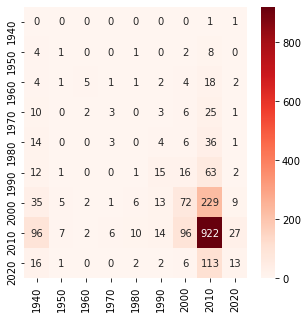


 20%|████████████████▊                                                                   | 1/5 [00:11<00:47, 11.87s/it]

---------------------------------------------------------------- 
 Support vecteur machine sans stat et  vectoriseur ngramme3 

Bons résultats 1184
Erreurs: 801
0.5964735516372796


C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0091    0.0180       110
        2000     1.0000    0.0054    0.0107       372
        2010     0.5957    1.0000    0.7466      1180
        2020     1.0000    0.0065    0.0130       153

    accuracy                         0.5965      1985
   macro avg     0.3995    0.1134    0.0876      1985
weighted avg     0.6740    0.5965    0.4478      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, '1960': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 38}, '1970': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 

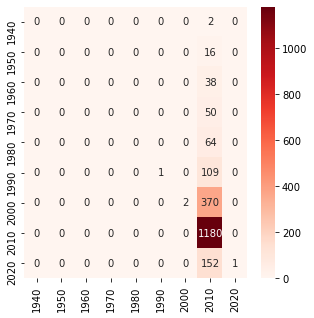


 40%|██████████████████████████████                                             | 2/5 [15:39:44<27:38:15, 33165.02s/it]

---------------------------------------------------------------- 
 SVM linéaire et  vectoriseur ngramme3 



C:\Users\andur\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Bons résultats 1164
Erreurs: 821
0.5863979848866498


C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     1.0000    0.0625    0.1176        16
        1960     0.2500    0.0263    0.0476        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.4615    0.1091    0.1765       110
        2000     0.3535    0.1882    0.2456       372
        2010     0.6206    0.9093    0.7377      1180
        2020     0.3500    0.0458    0.0809       153

    accuracy                         0.5864      1985
   macro avg     0.3373    0.1490    0.1562      1985
weighted avg     0.5006    0.5864    0.5024      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16}, '1960': {'precision': 0.25, 'recall': 0.02631578947368421, 'f1-score': 0.04761904761904762, 'support': 38}, '1970': {'precisio

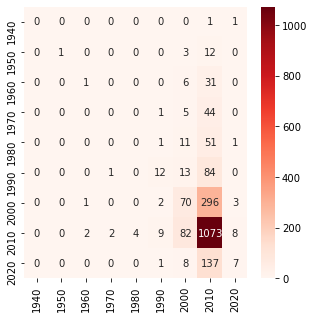


 60%|█████████████████████████████████████████████                              | 3/5 [15:45:23<10:05:52, 18176.12s/it]

---------------------------------------------------------------- 
 Arbre de decision et  vectoriseur ngramme3 

Bons résultats 1203
Erreurs: 782
0.6060453400503778


C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     1.0000    0.0818    0.1513       110
        2000     0.5714    0.0323    0.0611       372
        2010     0.6046    0.9873    0.7499      1180
        2020     0.6071    0.1111    0.1878       153

    accuracy                         0.6060      1985
   macro avg     0.3092    0.1347    0.1278      1985
weighted avg     0.5687    0.6060    0.4801      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, '1960': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 38}, '1970': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 

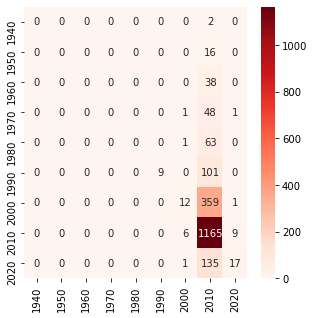


 80%|████████████████████████████████████████████████████████████▊               | 4/5 [15:46:44<3:03:52, 11032.48s/it]

---------------------------------------------------------------- 
 Random Forest et  vectoriseur ngramme3 

Bons résultats 1180
Erreurs: 805
0.5944584382871536
              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.0000    0.0000    0.0000        16
        1960     0.0000    0.0000    0.0000        38
        1970     0.0000    0.0000    0.0000        50
        1980     0.0000    0.0000    0.0000        64
        1990     0.0000    0.0000    0.0000       110
        2000     0.0000    0.0000    0.0000       372
        2010     0.5945    1.0000    0.7457      1180
        2020     0.0000    0.0000    0.0000       153

    accuracy                         0.5945      1985
   macro avg     0.0661    0.1111    0.0829      1985
weighted avg     0.3534    0.5945    0.4433      1985

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, '

C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andur\anaconda3\lib\site-packages\sklearn\metr

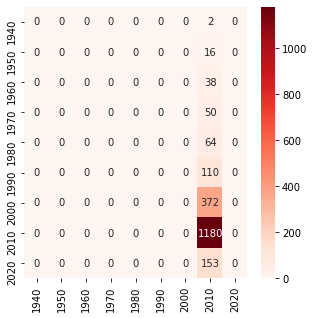


 19%|██████████████▏                                                           | 5/26 [16:07:50<67:44:56, 11614.13s/it]


ValueError: not a built-in stop list: french

In [206]:
#classifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

list_classifieur = [
    ["Perceptron", Perceptron(eta0=0.1, random_state=0)],
    ["Support vecteur machine sans stat", svm.SVC() ],
    ["SVM linéaire", svm.LinearSVC()], # a modifier !!!!!!!!!!
    ["Arbre de decision",DecisionTreeClassifier(max_depth=5)],
    ["Random Forest",RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)],
    #["Naive Bayes", GaussianNB()]
]
list_vectorizer = [#ajouter nlemma
    ["vectoriseur simple ", CountVectorizer() ],
    ["vectoriseur sans maj", CountVectorizer(ngram_range=(1, 1), lowercase=True)],
    ["vectoriseur ngramme", CountVectorizer(ngram_range=(1, 2))],
    ["vectoriseur ngramme2", CountVectorizer(ngram_range=(2, 2))],
    ["vectoriseur ngramme3", CountVectorizer(ngram_range=(2, 3))],
    ["stopwords",CountVectorizer(ngram_range=(1, 1), stop_words='french')],
    ["max_features",CountVectorizer(ngram_range=(1, 1), max_features = 10)],
    ["max_features2",CountVectorizer(ngram_range=(1, 1), max_features = 100)],
    ["vectoriseur sans maj et ngramme", CountVectorizer(ngram_range=(1, 2), lowercase=True)],
    ["vectoriseur sans maj et ngramme2", CountVectorizer(ngram_range=(2, 2), lowercase=True)],
    ["vectoriseur sans maj et ngramme3", CountVectorizer(ngram_range=(2, 2), lowercase=True)],
    ["vectoriseur sans maj et max_features", CountVectorizer(ngram_range=(1, 1), lowercase=True ,max_features = 10)],
    ["vectoriseur sans maj et stopwords", CountVectorizer(ngram_range=(1, 1), stop_words='french', lowercase=True)],
    ["vectoriseur ngramme et stopwords", CountVectorizer(ngram_range=(1, 2), stop_words='french')],
    ["vectoriseur ngramme et max_features", CountVectorizer(ngram_range=(1, 2), max_features = 10)],
    ["vectoriseur ngramme et max_features2", CountVectorizer(ngram_range=(1, 2), max_features = 100)],
    ["vectoriseur ngramme2 et stopwords", CountVectorizer(ngram_range=(2, 2), stop_words='french')],
    ["vectoriseur ngramme2 et max_features", CountVectorizer(ngram_range=(2, 2), max_features = 10)],
    ["vectoriseur ngramme2 et max_features2", CountVectorizer(ngram_range=(2, 2), max_features = 100)],
    ["vectoriseur sans maj, ngramme et stopwords", CountVectorizer(ngram_range=(1, 2), lowercase=True,  stop_words='french')],
    ["vectoriseur sans maj, ngramme2 et stopwords", CountVectorizer(ngram_range=(2, 2), lowercase=True,  stop_words='french')],
    ["vectoriseur sans maj, max_features et stopwords", CountVectorizer(max_features = 10, lowercase=True,  stop_words='french')],
    ["vectoriseur ngramme, max_features et stopwords", CountVectorizer(ngram_range=(1, 2), max_features = 10, stop_words='french')],
    ["vectoriseur ngramme2, max_features et stopwords", CountVectorizer(ngram_range=(2, 2), max_features = 10, stop_words='french')],
    ["vectoriseur total 1", CountVectorizer(ngram_range=(1, 2), max_features = 10, stop_words='french', lowercase=True)],
    ["vectoriseur total 1", CountVectorizer(ngram_range=(2, 2), max_features = 10, stop_words='french', lowercase=True)],
]
#-------------------------------------------------------------------------------------------------------------------------------------------
with open("resultat/DonneesClassifieur2.json", "a") as f:
    f.write("[")
    f.write("\n")
    f.close()
#-------------------------------------------------------------------------------------------------------------------------------------------
#ppn = Perceptron(eta0=0.1, random_state=0)
#ppn.fit(X_train, y_train)
#y_pred = ppn.predict(X_test)
# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
for nom_vectoriseur,V in tqdm.tqdm(list_vectorizer):
    X = V.fit_transform(liste_paroles)# On a bien le "X", il nous manque le "y" :
    y = liste_date
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    for nom, classifieur in tqdm.tqdm(list_classifieur):
        print("---------------------------------------------------------------- \n",nom,"et ",nom_vectoriseur, "\n")
        classifieur.fit(X_train, y_train)
        y_pred = classifieur.predict(X_test)
        # On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
        good = (y_test == y_pred).sum()
        bad = (y_test != y_pred).sum()
        Resultat = []
        Resultat.append(str(good))
        Resultat.append(str(bad))
        print('Bons résultats %d' % good)
        print('Erreurs: %d' % bad)
        print(good/(bad+good))
#-----------------------------------------------------------------------------------------------------------
        nom_classes = ["1940","1950","1960","1970","1980","1990","2000","2010","2020"]
        report2 = classification_report(y_test, y_pred, target_names=nom_classes, digits=4)
        print(report2)
#-----------------------------------------------------------------------------------------------------------
        report = classification_report(y_test, y_pred, target_names=nom_classes, digits=4, output_dict = True)
        print(report)
        with open("resultat/classificatio_report2.json", "w") as w:
            w.write(json.dumps(report, indent=2))
#-----------------------------------------------------------------------------------------------------------
        with open("resultat/DonneesClassifieur2.json", "a") as f:
            for objet in range(0,len(Resultat),2):
                f.write(""""%s """%nom)
                f.write("et")
                f.write(""" %s" """%nom_vectoriseur)
                f.write("{")
                f.write("\n")
                f.write(""""Bons résultats" :""")
                f.write(Resultat[objet])
                f.write(",")
                f.write("\n")
                f.write(""""Erreurs" :""")
                f.write(Resultat[objet+1])
                f.write(",")
                f.write("\n")
                f.write("}")
                f.write(",")
                f.write("\n")
                with open("resultat/2report_classifier="+nom+"_dataset=date.txt", "a") as w:
                    w.write(""""%s """%nom)
                    w.write(""" %s" """%nom_vectoriseur)
                    w.write("\n")
                    w.write(report2)
                    w.write("-"*200)
                    w.write("\n")
        matrice_confusion = confusion_matrix(y_test, y_pred)
        print(matrice_confusion)
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
            xticklabels=nom_classes, yticklabels=nom_classes, 
            annot=True, fmt ="d")
        plt.show()
            
with open("resultat/DonneesClassifieur2.json", "a") as f:
    f.write("]")
    f.close()

In [193]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

##Comme nous savons que le 1 c'est spam et le 0 c'est ham, on peut écrire ceci
nom_classes = ["1940","1950","1960","1970","1980","1990","2000","2010","2020"]
report = classification_report(y_test, y_pred, target_names=nom_classes, digits=4)
print(report)

              precision    recall  f1-score   support

         194       0.00      0.00      0.00         2
         195       0.50      0.06      0.11        16
         196       0.33      0.26      0.29        38
         197       0.12      0.06      0.08        50
         198       0.06      0.05      0.05        64
         199       0.24      0.14      0.17       110
         200       0.35      0.41      0.38       372
         201       0.72      0.75      0.73      1180
         202       0.34      0.27      0.30       153

    accuracy                           0.56      1985
   macro avg       0.30      0.22      0.24      1985
weighted avg       0.55      0.56      0.55      1985

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.5000    0.0625    0.1111        16
        1960     0.3333    0.2632    0.2941        38
        1970     0.1250    0.0600    0.0811        50
        1980     0.0625 

In [194]:
## On peut enregistrer le classification report pour s'en servir plus tard
with open("resultat/report_classifier=perceptron_dataset=date.txt", "w") as w:
    w.write(report)


In [195]:
with open("resultat/report_classifier=perceptron_dataset=date.txt") as f:
    r = f.read()
print(r)

              precision    recall  f1-score   support

        1940     0.0000    0.0000    0.0000         2
        1950     0.5000    0.0625    0.1111        16
        1960     0.3333    0.2632    0.2941        38
        1970     0.1250    0.0600    0.0811        50
        1980     0.0625    0.0469    0.0536        64
        1990     0.2381    0.1364    0.1734       110
        2000     0.3494    0.4086    0.3767       372
        2010     0.7159    0.7475    0.7313      1180
        2020     0.3445    0.2680    0.3015       153

    accuracy                         0.5577      1985
   macro avg     0.2965    0.2214    0.2359      1985
weighted avg     0.5464    0.5577    0.5485      1985



In [196]:
import json
report = classification_report(y_test, y_pred, target_names=nom_classes, digits=4, output_dict = True)
print(report)
with open("resultat/classificatio_report.json", "w") as w:
    w.write(json.dumps(report, indent=2))

{'1940': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1950': {'precision': 0.5, 'recall': 0.0625, 'f1-score': 0.1111111111111111, 'support': 16}, '1960': {'precision': 0.3333333333333333, 'recall': 0.2631578947368421, 'f1-score': 0.29411764705882354, 'support': 38}, '1970': {'precision': 0.125, 'recall': 0.06, 'f1-score': 0.08108108108108109, 'support': 50}, '1980': {'precision': 0.0625, 'recall': 0.046875, 'f1-score': 0.05357142857142857, 'support': 64}, '1990': {'precision': 0.23809523809523808, 'recall': 0.13636363636363635, 'f1-score': 0.17341040462427745, 'support': 110}, '2000': {'precision': 0.34942528735632183, 'recall': 0.40860215053763443, 'f1-score': 0.3767038413878563, 'support': 372}, '2010': {'precision': 0.7159090909090909, 'recall': 0.747457627118644, 'f1-score': 0.7313432835820896, 'support': 1180}, '2020': {'precision': 0.3445378151260504, 'recall': 0.2679738562091503, 'f1-score': 0.30147058823529405, 'support': 153}, 'accuracy': 0.55768261964735

[[  0   0   0   0   0   0   1   0   1]
 [  0   1   2   3   0   0   6   4   0]
 [  1   1  10   3   2   3  11   6   1]
 [  2   0   2   3   4   4  17  15   3]
 [  2   0   2   1   3   3  24  28   1]
 [  4   0   2   0   6  15  37  42   4]
 [ 12   0   1   4   9  15 152 163  16]
 [ 10   0  11  10  20  20 175 882  52]
 [  1   0   0   0   4   3  12  92  41]]


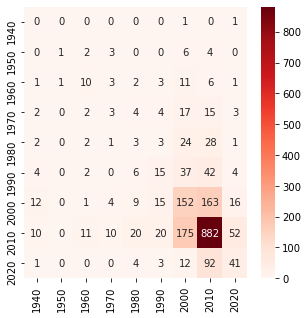

In [198]:
from sklearn.metrics import confusion_matrix

matrice_confusion = confusion_matrix(y_test, y_pred)
print(matrice_confusion)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
            xticklabels=nom_classes, yticklabels=nom_classes, 
            annot=True, fmt ="d")

#sns.heatmap(matrice_confusion, xticklabels=["ham", "spam"], yticklabels=["ham", "spam"], cmap = plt.cm.Greys )
#plt.savefig()
plt.show()

# Test sur un exemple de la structure du fichier .json

In [128]:
x = {"555" :{
    "blabla" : 3,
    "toto" : 5,
    "tutu" : 4,
    "info_titre": [
      {
        "Titre": "2\u00e8me Lettre \u00e0 Toussenot by\u00a0Georges\u00a0Brassens",
        "Auteur": "Georges Brassens"
      },
      {
        "Titre": "Tout le long des rues by\u00a0Tino\u00a0Rossi",
        "Auteur": "Tino Rossi"
      }
    ],
    "chanson": [
      "Paris, 24.10.1946\n\nCher ami,\n\nLa semaine prochaine, nous essayerons de publier ton \u00e9tude sur le style, et cela me co\u00fbtera une formidable engueulade de la part du Comit\u00e9 national (car il existe un Comit\u00e9 national !) qui est assez r\u00e9fractaire aux choses du cin\u00e9ma, ainsi qu'a celles de l'Esprit d'ailleurs... \u00c0 tel point que, pour \u00e9viter de tout envoyer promener par suite de son insistance \u00e0 me consid\u00e9rer comme le dernier des imb\u00e9ciles, j'ai d\u00fb cesser d'\u00e9crire mes articles hebdomadaires. Cela me permet de me consacrer \u00e0 mes po\u00e9sies et \u00e0 ma pipe. Il para\u00eet que les lecteurs du Libertaire ne prennent aucune esp\u00e8ce d'int\u00e9r\u00eat \u00e0 la lecture de mes << conneries >> ! C'est possible, apr\u00e8s tout. Excuse-moi de te raconter tout \u00e7a qui \u00e9videmment ne te concerne pas, mais il y a des moments o\u00f9, ext\u00e9nu\u00e9 par la stupidit\u00e9 bourbeuse de nu\u00e9es de cuistres opini\u00e2tres, on est oblig\u00e9 de faire appel \u00e0 des hommes dont les facult\u00e9s intellectuelles ne sont pas en froid avec la subtilit\u00e9.\nJ'esp\u00e8re que le financier qui se dispose - le malheureux ! - \u00e0 placer des capitaux dans notre prochain journal ne tardera pas \u00e0 nous envoyer son ch\u00e8que, car j'ai une violente envie d'\u00e9crire dans une feuille libre, entour\u00e9 d'\u00e9crivains et non de rustres et d'ignorants ab\u00e9c\u00e9daires. Esp\u00e9rons donc, mon vieux, et \u00e0 bient\u00f4t de te lire.\n\nAmicalement.\n\nGeorges Brassens.",
      "[Refrain]\nTout le long, le long des rues\nJe m'en vais la nuit venue\nChercher jusqu'au petit jour\nTout ce qui reste de notre amour\nPas un coin, pas un quartier\nQui ne parle tout entier\nDe mon r\u00eave disparu\nTout le long, le long des rues\n\n[Couplet unique]\nLe vent tra\u00eene sa rengaine\nDans un ciel aussi lourd que ma peine\nLes nuages sont l'image\nDes beaux jours qui ne reviendront plus\nDans la foule qui s'\u00e9coule\nLe pass\u00e9 lentement se d\u00e9roule\nJusqu'au tendre soir, o\u00f9 pleins d'espoir\nNos c\u0153urs se sont connus\n\n[Refrain]\nTout le long, le long des rues\nJe m'en vais la nuit venue\nChercher jusqu'au petit jour\nTout ce qui reste de notre amour\nVagabond sentimental\nMon c\u0153ur dans ce dernier bal\nPour une ombre disparue\nTout le long, le long des rues"
    ]
  },
     "556" :{
    "blabla" : 3,
    "toto" : 5,
    "tutu" : 4,
    "info_titre": [
      {
        "Titre": "2\u00e8me Lettre \u00e0 Toussenot by\u00a0Georges\u00a0Brassens",
        "Auteur": "Georges Brassens"
      },
      {
        "Titre": "Tout le long des rues by\u00a0Tino\u00a0Rossi",
        "Auteur": "Tino Rossi"
      }
    ],
    "chanson": [
      "Paris, 24.10.1946\n\nCher ami,\n\nLa semaine prochaine, nous essayerons de publier ton \u00e9tude sur le style, et cela me co\u00fbtera une formidable engueulade de la part du Comit\u00e9 national (car il existe un Comit\u00e9 national !) qui est assez r\u00e9fractaire aux choses du cin\u00e9ma, ainsi qu'a celles de l'Esprit d'ailleurs... \u00c0 tel point que, pour \u00e9viter de tout envoyer promener par suite de son insistance \u00e0 me consid\u00e9rer comme le dernier des imb\u00e9ciles, j'ai d\u00fb cesser d'\u00e9crire mes articles hebdomadaires. Cela me permet de me consacrer \u00e0 mes po\u00e9sies et \u00e0 ma pipe. Il para\u00eet que les lecteurs du Libertaire ne prennent aucune esp\u00e8ce d'int\u00e9r\u00eat \u00e0 la lecture de mes << conneries >> ! C'est possible, apr\u00e8s tout. Excuse-moi de te raconter tout \u00e7a qui \u00e9videmment ne te concerne pas, mais il y a des moments o\u00f9, ext\u00e9nu\u00e9 par la stupidit\u00e9 bourbeuse de nu\u00e9es de cuistres opini\u00e2tres, on est oblig\u00e9 de faire appel \u00e0 des hommes dont les facult\u00e9s intellectuelles ne sont pas en froid avec la subtilit\u00e9.\nJ'esp\u00e8re que le financier qui se dispose - le malheureux ! - \u00e0 placer des capitaux dans notre prochain journal ne tardera pas \u00e0 nous envoyer son ch\u00e8que, car j'ai une violente envie d'\u00e9crire dans une feuille libre, entour\u00e9 d'\u00e9crivains et non de rustres et d'ignorants ab\u00e9c\u00e9daires. Esp\u00e9rons donc, mon vieux, et \u00e0 bient\u00f4t de te lire.\n\nAmicalement.\n\nGeorges Brassens.",
      "[Refrain]\nTout le long, le long des rues\nJe m'en vais la nuit venue\nChercher jusqu'au petit jour\nTout ce qui reste de notre amour\nPas un coin, pas un quartier\nQui ne parle tout entier\nDe mon r\u00eave disparu\nTout le long, le long des rues\n\n[Couplet unique]\nLe vent tra\u00eene sa rengaine\nDans un ciel aussi lourd que ma peine\nLes nuages sont l'image\nDes beaux jours qui ne reviendront plus\nDans la foule qui s'\u00e9coule\nLe pass\u00e9 lentement se d\u00e9roule\nJusqu'au tendre soir, o\u00f9 pleins d'espoir\nNos c\u0153urs se sont connus\n\n[Refrain]\nTout le long, le long des rues\nJe m'en vais la nuit venue\nChercher jusqu'au petit jour\nTout ce qui reste de notre amour\nVagabond sentimental\nMon c\u0153ur dans ce dernier bal\nPour une ombre disparue\nTout le long, le long des rues"
    ]
  },
}

In [152]:
liste_date = []
liste_parole = []
for date, dic in x.items():
    chanson = dic.get("chanson")
    for z in chanson:
        liste_date.append(date)
        liste_parole.append(z)
print(liste_date)
print(liste_parole)

['555', '555', '556', '556']
["Paris, 24.10.1946\n\nCher ami,\n\nLa semaine prochaine, nous essayerons de publier ton étude sur le style, et cela me coûtera une formidable engueulade de la part du Comité national (car il existe un Comité national !) qui est assez réfractaire aux choses du cinéma, ainsi qu'a celles de l'Esprit d'ailleurs... À tel point que, pour éviter de tout envoyer promener par suite de son insistance à me considérer comme le dernier des imbéciles, j'ai dû cesser d'écrire mes articles hebdomadaires. Cela me permet de me consacrer à mes poésies et à ma pipe. Il paraît que les lecteurs du Libertaire ne prennent aucune espèce d'intérêt à la lecture de mes << conneries >> ! C'est possible, après tout. Excuse-moi de te raconter tout ça qui évidemment ne te concerne pas, mais il y a des moments où, exténué par la stupidité bourbeuse de nuées de cuistres opiniâtres, on est obligé de faire appel à des hommes dont les facultés intellectuelles ne sont pas en froid avec la subt